<a href="https://colab.research.google.com/github/TitanLeonov/Leonov_Alexander_PI3-1b_computer_math_/blob/main/9.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F%20%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2%20%D0%B8%20%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%A4%D1%83%D1%80%D1%8C%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2_%D0%B8_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%A4%D1%83%D1%80%D1%8C%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №9. Генерация сигналов и преобразования Фурье

# Блок №1. Базовый уровень

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import spectrogram

## **Задание 1: Генерация сигналов**



В этом задании вам нужно создать различные виды сигналов. Сигналы являются основой цифровой обработки сигналов, и умение их генерировать является важным навыком.













1. **Синусоидальный сигнал**: Синусоидальный сигнал можно представить как $A \sin(2\pi ft + \phi)$, где $A$ - амплитуда, $f$ - частота, $\phi$ - фаза.

- Создайте функцию, которая принимает эти параметры, а также длительность сигнала, и возвращает сгенерированный сигнал.

### Пример:



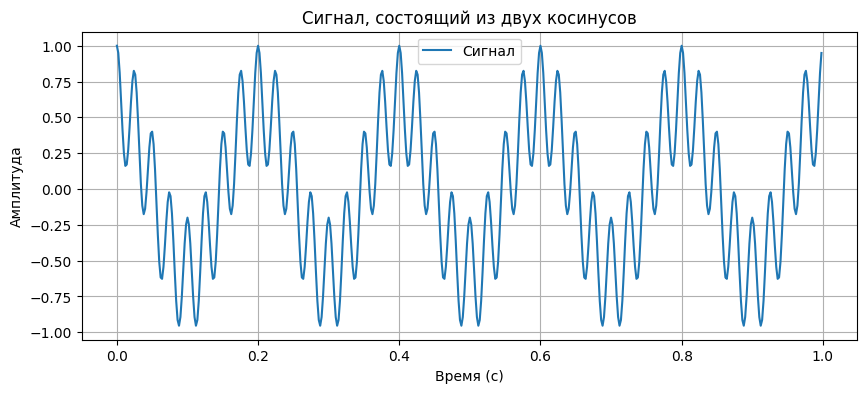

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
t = np.arange(0, T, 1/fs) # массив времени

f1 = 5.0        # частота первого косинуса
f2 = 40.0       # частота второго косинуса
a1 = 0.6        # амплитуда первого косинуса
a2 = 0.4        # амплитуда второго косинуса
signal = a1*np.cos(2*np.pi*f1*t) + a2*np.cos(2*np.pi*f2*t)


plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Cигнал, состоящий из двух косинусов')
plt.legend()
plt.grid(True)
plt.show()


### Ваш код:

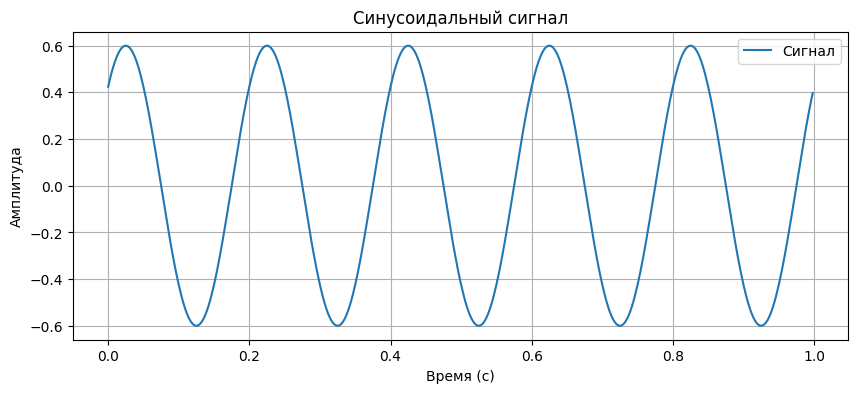

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoidal_signal(duration, sampling_freq, amplitude, frequency, phase=0):
    t = np.arange(0, duration, 1/sampling_freq)
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return signal


T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
f1 = 5.0        # частота сигнала
a1 = 0.6        # амплитуда сигнала
phase = np.pi/4 # фаза сигнала

# Создание сигнала
signal = generate_sinusoidal_signal(T, fs, a1, f1, phase)


t = np.arange(0, T, 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Синусоидальный сигнал')
plt.legend()
plt.grid(True)
plt.show()
plt.show()

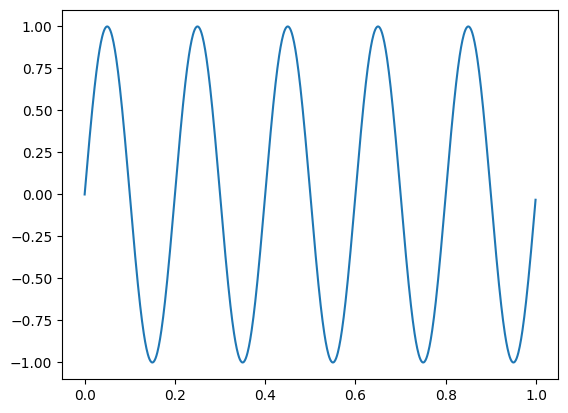

In [ ]:
# Пример

2. **Сумма синусоид**: Сигнал, состоящий из суммы двух синусоид, можно представить как $A_1 \sin(2\pi f_1t + \phi_1) + A_2 \sin(2\pi f_2t + \phi_2)$.

- Создайте функцию, которая принимает параметры для двух синусоид, а также длительность сигнала, и возвращает сгенерированный сигнал.

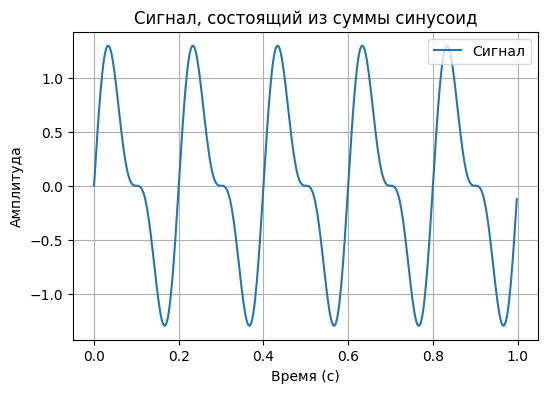

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def sum_sin_signal(A1, f1, phi1, A2, f2, phi2, T):

  phi1 = phi1 * 180 / np.pi
  phi2 = phi2 * 180 / np.pi
  fs = 500
  t = np.arange(0, T, 1/fs)

  # Создание сигнала
  signal = A1*np.sin(2*np.pi*f1*t+phi1) + A2*np.sin(2*np.pi*f2*t+phi2)
  return signal, t

signal, t = sum_sin_signal(1, 5, 0, 0.5, 10, 0, 1)

plt.figure(figsize=(6, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал, состоящий из суммы синусоид')
plt.legend()
plt.grid(True)
plt.show()

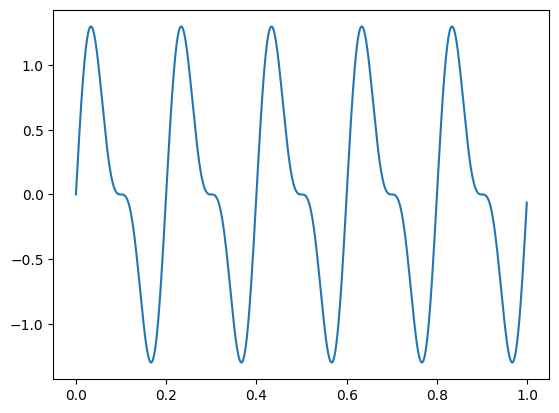

In [ ]:
# Пример

3. **Шумовой сигнал**: Шумовой сигнал (или белый шум) можно сгенерировать как случайные значения из нормального распределения.

- Создайте функцию, которая принимает амплитуду шума и длительность сигнала, и возвращает сгенерированный шумовой сигнал.

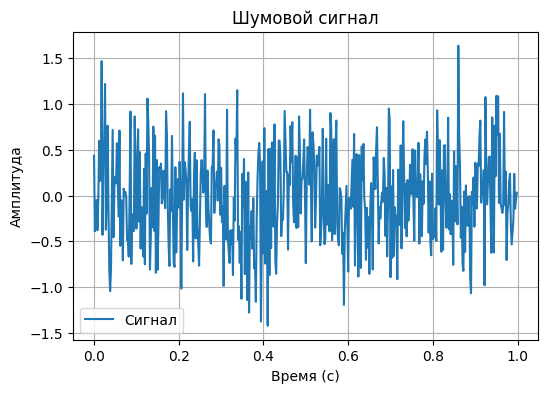

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_noise_signal(duration, sampling_freq, noise_amplitude):
    t = np.linspace(0, duration, int(duration * sampling_freq), endpoint=False)
    noise_signal = noise_amplitude * np.random.randn(len(t))
    return t, noise_signal


T = 1.0
fs = 500.0
noise_amp = 0.5

# Создание шумового сигнала
t, noise_signal = generate_noise_signal(T, fs, noise_amp)

# Визуализация шумового сигнала
plt.figure(figsize=(6, 4))
plt.plot(t, noise_signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Шумовой сигнал')
plt.legend()
plt.grid(True)
plt.show()


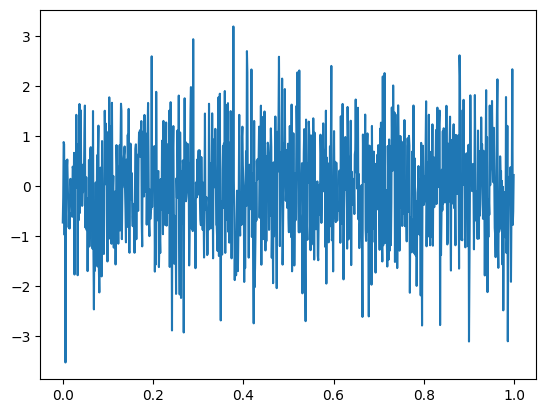

In [ ]:
# Пример

4. **Синусоида плюс шум**: Сигнал, который представляет собой сумму синусоиды и шума, можно сгенерировать путем сложения синусоидального и шумового сигналов.
- Создайте функцию, которая принимает параметры для синусоиды и шума, а также длительность сигнала, и возвращает сгенерированный сигнал.

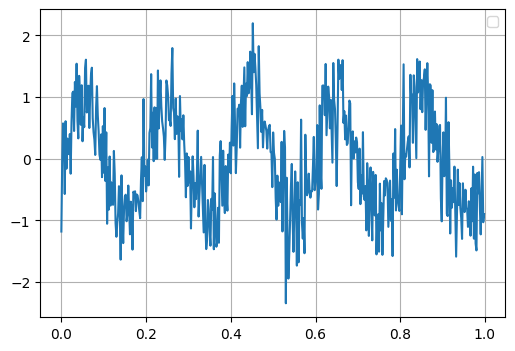

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def sin_noise_signal(A1, f, phi, A2, T):

  phi = phi * 180 / np.pi
  fs = 500
  t = np.arange(0, T, 1/fs)
  signal = A1 * np.sin(2 * np.pi * f * t + phi) + A2 * np.random.normal(size=fs)
  return signal, t

signal, t = sin_noise_signal(1, 5, 0, 0.5, 1)

plt.figure(figsize=(6, 4))
plt.plot(t, signal)
plt.legend()
plt.grid(True)
plt.show()


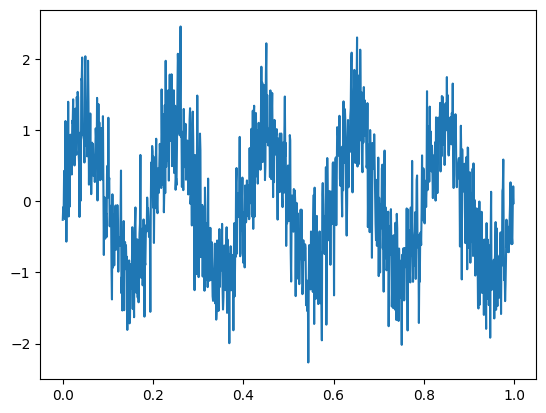

In [ ]:
# Пример

## **Задание 2: Преобразование Фурье**


Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Это основной инструмент для анализа сигналов. Создайте функцию, которая принимает сигнал и возвращает его преобразование Фурье.


1. Примените преобразование Фурье к синусоидальному сигналу и визуализируйте результат.


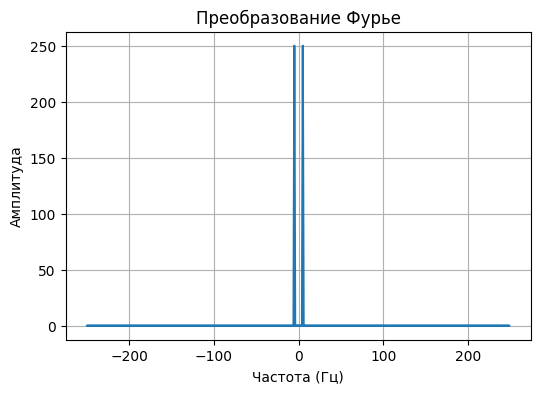

In [ ]:
def fourier_transform(signal, sampling_freq):
    transform = fft(signal)
    frequencies = fftfreq(len(signal), 1/sampling_freq)
    return frequencies, np.abs(transform)

A = 1
f = 5
phi = 0
T = 1.0
fs = 500


t = np.linspace(0, T, int(T * fs), endpoint=False)
sinusoidal_signal = A * np.sin(2 * np.pi * f * t + phi)

# Преобразование Фурье
frequencies, fft_values = fourier_transform(sinusoidal_signal, fs)


plt.figure(figsize=(6, 4))
plt.plot(frequencies, fft_values)
plt.title('Преобразование Фурье')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

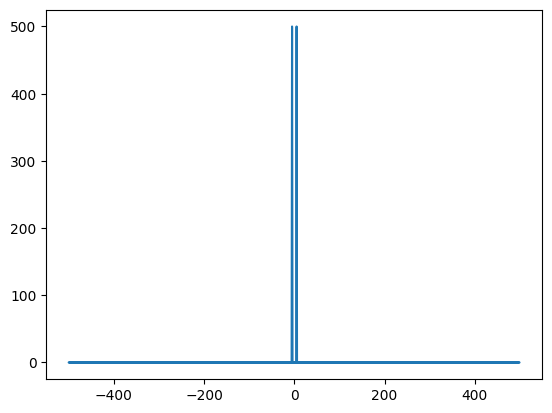

In [ ]:
# Пример

2. Примените преобразование Фурье к сигналу, состоящему из суммы двух синусоид, и визуализируйте результат.


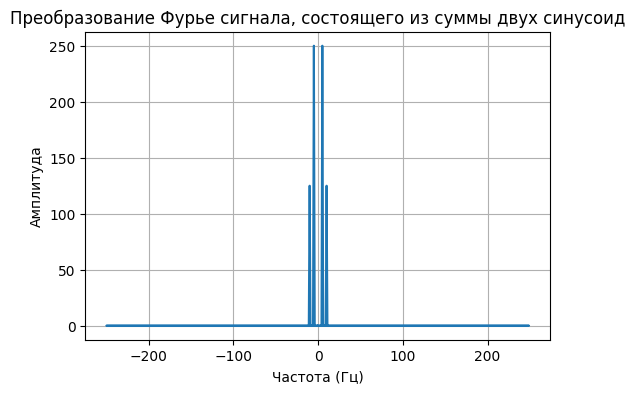

In [ ]:
def fourier_transform(signal, sampling_freq):
    transform = fft(signal)
    frequencies = fftfreq(len(signal), 1/sampling_freq)
    return frequencies, np.abs(transform)


A1 = 1.0
f1 = 5.0
phi1 = 0

A2 = 0.5
f2 = 10.0
phi2 = np.pi/4

T = 1.0
fs = 500.0

# Создание сигнала, состоящего из суммы двух синусоид
t = np.linspace(0, T, int(T * fs), endpoint=False)
signal = A1 * np.sin(2 * np.pi * f1 * t + phi1) + A2 * np.sin(2 * np.pi * f2 * t + phi2)

# Преобразование Фурье
frequencies, fft_values = fourier_transform(signal, fs)

plt.figure(figsize=(6, 4))
plt.plot(frequencies, fft_values)
plt.title('Преобразование Фурье сигнала, состоящего из суммы двух синусоид')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

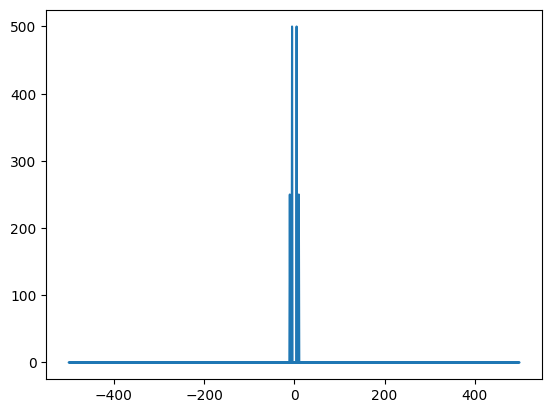

In [ ]:
# Пример

3. Примените преобразование Фурье к шумовому сигналу и визуализируйте результат.


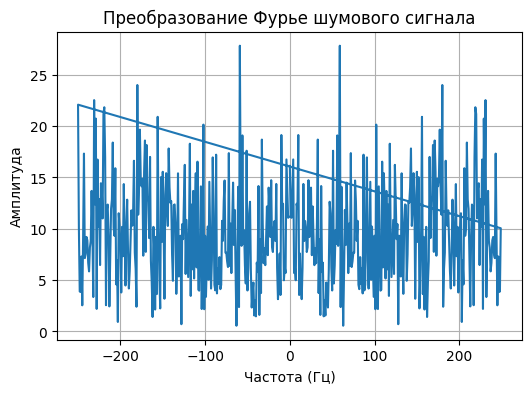

In [ ]:
def fourier_transform(signal, sampling_freq):
    transform = fft(signal)
    frequencies = fftfreq(len(signal), 1/sampling_freq)
    return frequencies, np.abs(transform)


T = 1.0
fs = 500.0
noise_amplitude = 0.5

# Создание шумового сигнала
t = np.linspace(0, T, int(T * fs), endpoint=False)
noise_signal = noise_amplitude * np.random.randn(len(t))

# Преобразование Фурье
frequencies, fft_values = fourier_transform(noise_signal, fs)


plt.figure(figsize=(6, 4))
plt.plot(frequencies, fft_values)
plt.title('Преобразование Фурье шумового сигнала')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)

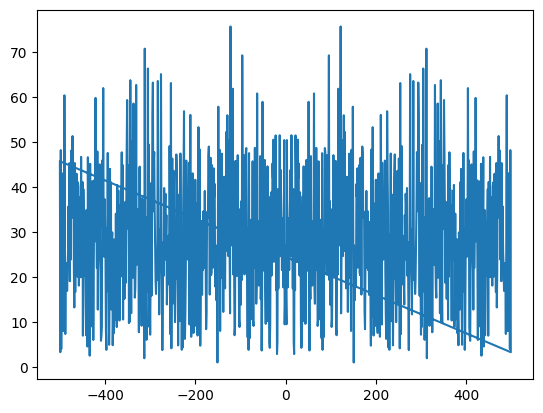

In [ ]:
# Пример

4. Примените преобразование Фурье к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результат.

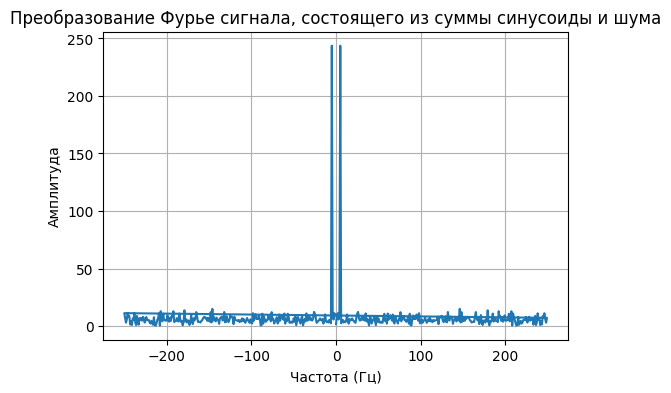

In [ ]:
def fourier_transform(signal, sampling_freq):
    transform = fft(signal)
    frequencies = fftfreq(len(signal), 1/sampling_freq)
    return frequencies, np.abs(transform)

# Параметры сигнала
A = 1.0         # амплитуда синусоиды
f = 5.0         # частота синусоиды
phi = 0         # фаза синусоиды
T = 1.0         # длительность сигнала в секундах
fs = 500.0      # частота дискретизации (в герцах)
noise_amplitude = 0.3 # амплитуда шума

# Создание сигнала, представляющего сумму синусоиды и шума
t = np.linspace(0, T, int(T * fs), endpoint=False)
sin_signal = A * np.sin(2 * np.pi * f * t + phi)
noise_signal = noise_amplitude * np.random.randn(len(t))
signal_with_noise = sin_signal + noise_signal

# Преобразование Фурье
frequencies, fft_values = fourier_transform(signal_with_noise, fs)

# Визуализация результатов преобразования Фурье
plt.figure(figsize=(6, 4))
plt.plot(frequencies, fft_values)
plt.title('Преобразование Фурье сигнала, состоящего из суммы синусоиды и шума')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

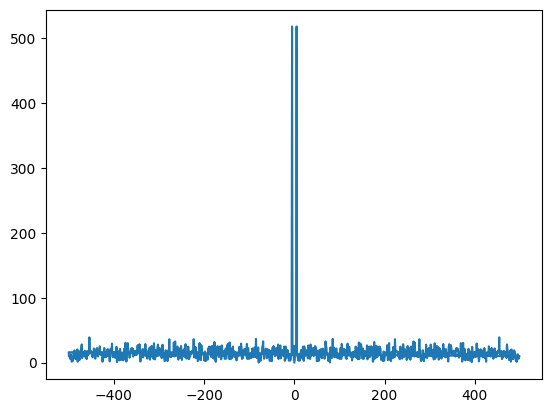

In [ ]:
# Пример

## **Задание 3: Фильтрация сигналов**

Фильтрация сигналов позволяет улучшить качество сигнала, убрав нежелательные частоты. Создайте функцию, которая принимает сигнал и частоту среза, и возвращает отфильтрованный сигнал.




1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.

In [ ]:
def signal_filtration(signal, cutoff):
  transform_fft = fft(signal)
  frequencies = fftfreq(len(signal), d=1/500)

  filter_mask = np.abs(frequencies) <= cutoff
  filtered_fft = transform_fft * filter_mask

  filtered_signal = ifft(filtered_fft).real

  return filtered_signal

signal, t = sum_sin_signal(1, 5, 0, 0.5, 10, 0, 1)
filtered_signal = signal_filtration(signal, 5)


In [ ]:
# Пример

2. Примените эту функцию к сигналу, который представляет собой сумму синусоиды и шума, и визуализируйте результаты до и после фильтрации.

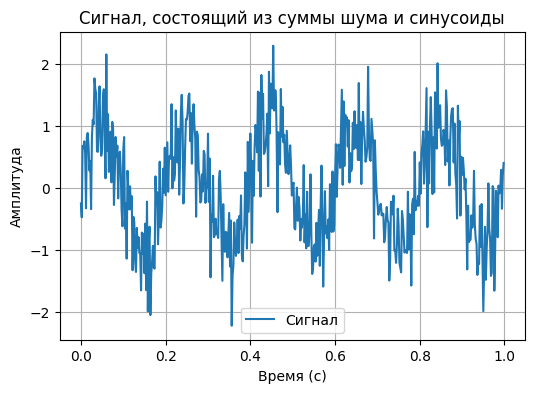

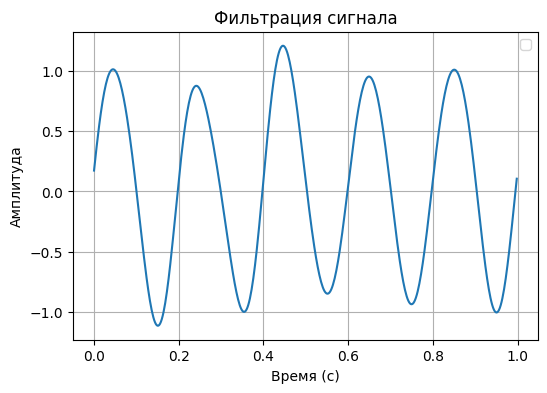

In [ ]:
signal, t = sin_noise_signal(1, 5, 0, 0.5, 1)

plt.figure(figsize=(6, 4))
plt.plot(t, signal, label='Сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал, состоящий из суммы шума и синусоиды')
plt.legend()
plt.grid(True)
plt.show()

filtered_signal = signal_filtration(signal, 10)

plt.figure(figsize=(6, 4))
plt.plot(t, filtered_signal)
plt.title('Фильтрация сигнала')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)
plt.show()

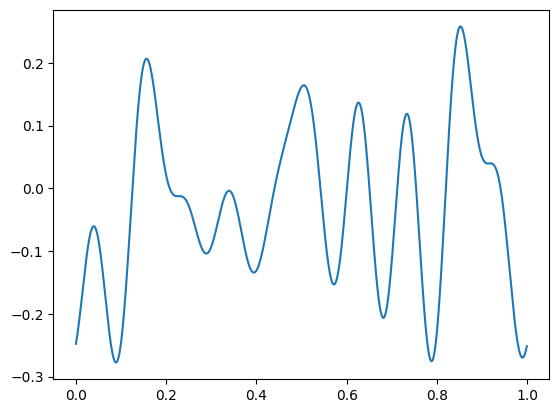

In [ ]:
# Пример

## **Задание 4: Анализ сигналов**

Анализ сигналов включает в себя различные методы и техники для изучения и понимания сигналов. Создайте функцию, которая принимает сигнал и возвращает его спектрограмму (**scipy.signal.spectrogram**).


**Спектрограмма** - это визуальное представление спектра частот сигнала во времени. Она показывает, какие частоты присутствуют в сигнале в каждый момент времени. Вот как правильно понимать спектрограмму:

- **Ось X**: Это время. Она показывает продолжительность сигнала. Каждый столбец на спектрограмме представляет собой отдельный момент времени.

- **Ось Y**: Это частота. Она показывает различные частоты, которые присутствуют в сигнале. Каждая строка на спектрограмме представляет собой отдельную частоту.

- **Значение**: Значение в каждой точке (x, y) показывает амплитуду (или интенсивность) данной частоты в данное время. Обычно более яркие цвета означают большую амплитуду, а более темные цвета - меньшую амплитуду.

Таким образом, спектрограмма позволяет вам видеть, как меняется спектральный состав сигнала во времени. Это может быть полезно во многих областях, включая анализ речи, музыку, радиосигналы и многое другое. Например, в анализе речи вы можете видеть, как меняются форманты (основные частоты) во время произношения различных звуков. В музыке вы можете видеть, как меняются ноты во время проигрывания песни.

1. Создайте функцию для вычисления и визуализации спектрограммы сигнала.


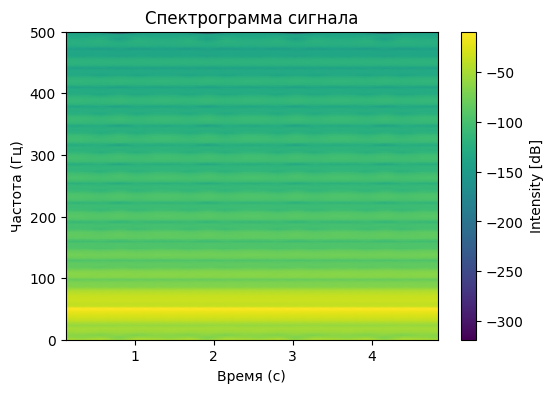

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def plot_spectrogram(signal, sampling_freq):
    f, t, Sxx = spectrogram(signal, fs=sampling_freq)
    plt.figure(figsize=(6, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title('Спектрограмма сигнала')
    plt.xlabel('Время (с)')
    plt.ylabel('Частота (Гц)')
    plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, sampling_freq / 2)
    plt.show()



T = 5.0
fs = 1000.0
t = np.linspace(0, T, int(T * fs), endpoint=False)


f = 50.0
signal = np.sin(2 * np.pi * f * t)


plot_spectrogram(signal, fs)


2. Примените эту функцию к различным сигналам, которые вы сгенерировали и проанализировали в предыдущих заданиях.

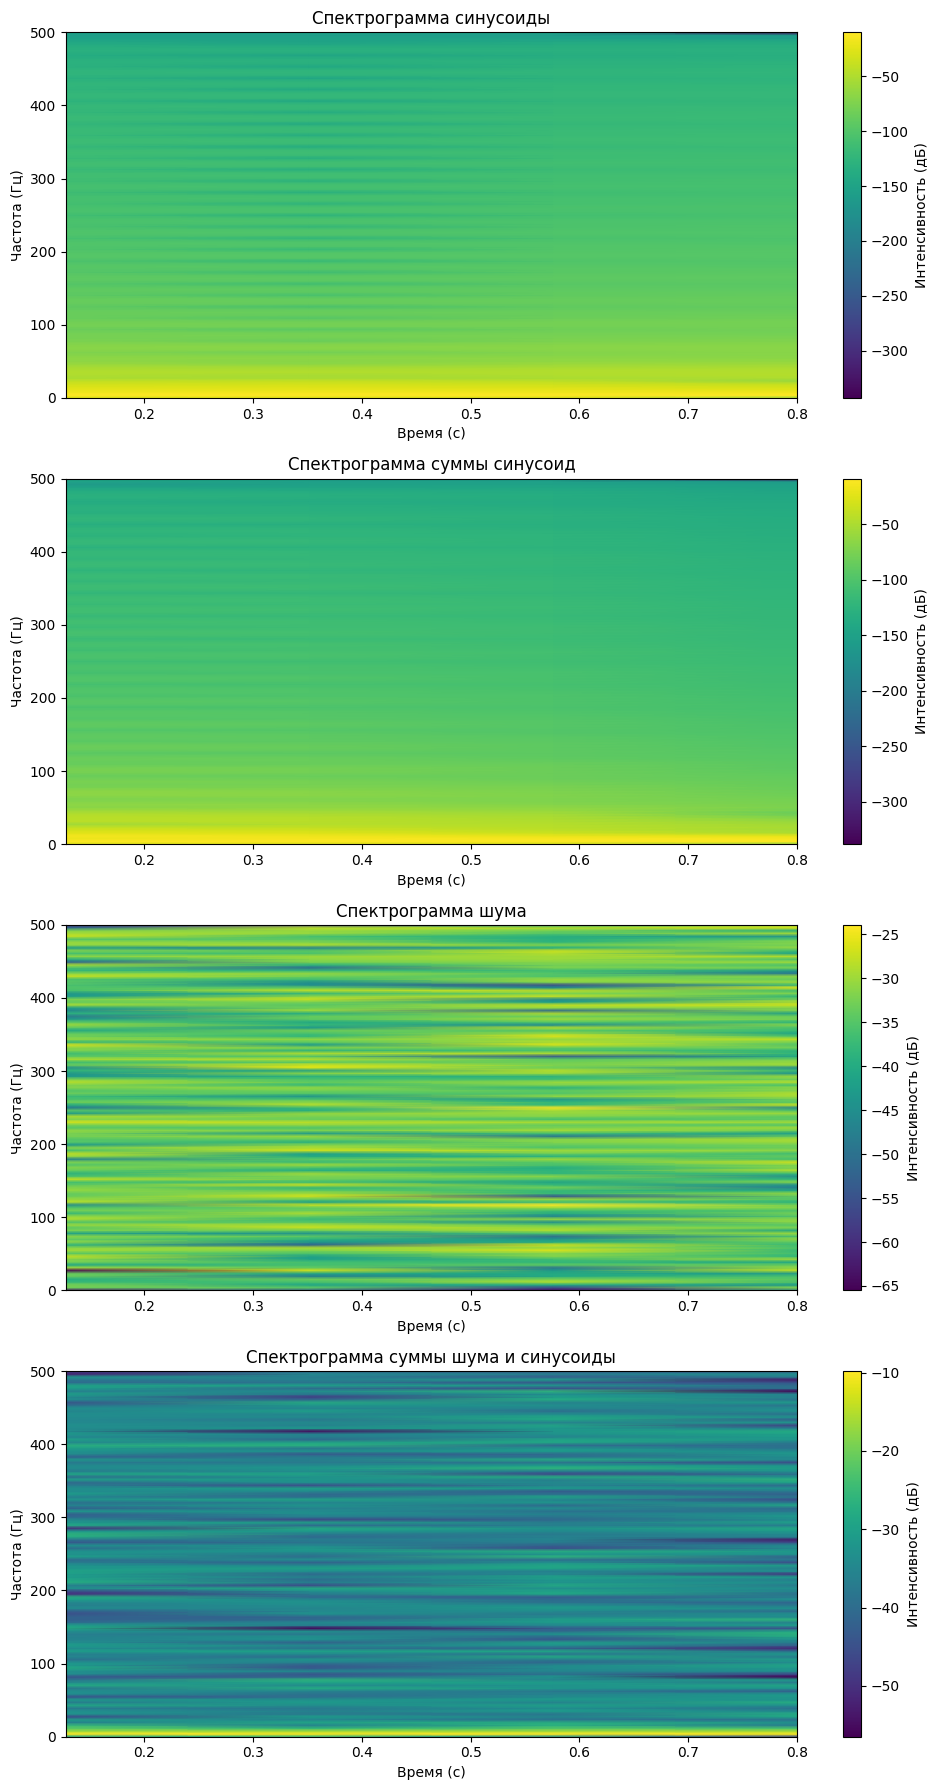

In [ ]:
t = np.linspace(0, 1, 1000, endpoint=False)
f = 5
A = 1
sin_signal = A * np.sin(2 * np.pi * f * t)

# Создаем сигнал, состоящий из суммы двух синусоид
sum_sin_signal = A * np.sin(2 * np.pi * 5 * t) + 0.5 * A * np.sin(2 * np.pi * 10 * t)

# Создаем шумовой сигнал
noise_signal = 0.5 * np.random.randn(len(t))

# Создаем сигнал, состоящий из суммы синусоиды и шума
sin_noise_signal = A * np.sin(2 * np.pi * f * t) + 0.5 * np.random.randn(len(t))

# Вычисляем и отображаем спектрограмму для каждого сигнала
plt.figure(figsize=(10, 18))

plt.subplot(4, 1, 1)
f, t, Sxx = spectrogram(sin_signal, fs=1000)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Спектрограмма синусоиды')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.colorbar(label='Интенсивность (дБ)')

plt.subplot(4, 1, 2)
f, t, Sxx = spectrogram(sum_sin_signal, fs=1000)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Спектрограмма суммы синусоид')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.colorbar(label='Интенсивность (дБ)')

plt.subplot(4, 1, 3)
f, t, Sxx = spectrogram(noise_signal, fs=1000)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Спектрограмма шума')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.colorbar(label='Интенсивность (дБ)')

plt.subplot(4, 1, 4)
f, t, Sxx = spectrogram(sin_noise_signal, fs=1000)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Спектрограмма суммы шума и синусоиды')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.colorbar(label='Интенсивность (дБ)')

plt.tight_layout()
plt.show()

In [ ]:
# Пример

# Блок №2. Повышенный уровень

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.io import wavfile

## **Задание 1: Чтение и визуализация звукового файла**











В этом задании вам нужно использовать функцию `wavfile.read` из модуля `scipy.io` для чтения звукового файла. Эта функция возвращает частоту дискретизации и данные аудиосигнала. Затем вы должны визуализировать эти данные с помощью `matplotlib.pyplot.plot`. В результате вы получите график амплитуды звукового сигнала во времени.

1. Используйте библиотеку `scipy.io.wavfile` для чтения звукового файла.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
rate, data = wavfile.read('/content/drive/MyDrive/Colab Notebooks/sample-15s.wav')
data[:, 1] = data[:, 0]
print(rate)
print(data)
print(data.shape)

44100
[[-2033 -2033]
 [-1037 -1037]
 [ 2662  2662]
 ...
 [ 2625  2625]
 [ 2588  2588]
 [ 2548  2548]]
(845568, 2)


2. Визуализируйте временную форму звукового сигнала.

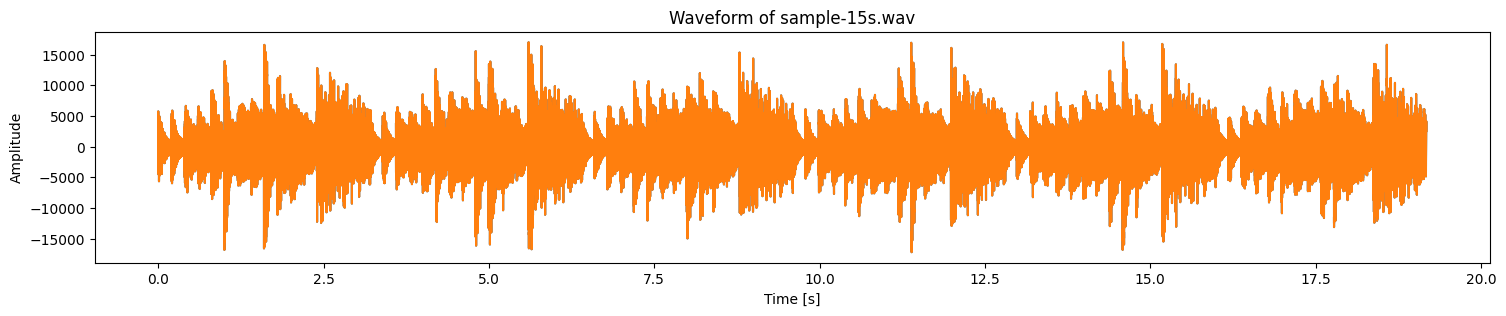

In [ ]:
t = np.arange(len(data)) / rate
plt.figure(figsize=(18, 3))
plt.plot(t, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform of sample-15s.wav')
plt.show()

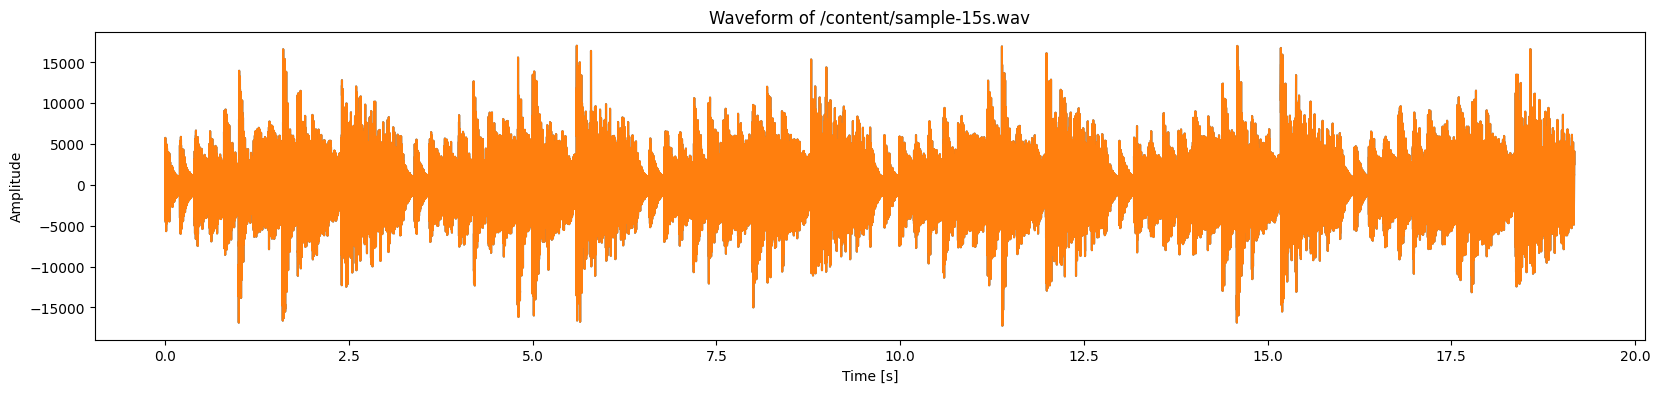

In [ ]:
# Пример

## **Задание 2: Применение преобразования Фурье**



Преобразование Фурье позволяет перейти от временного представления сигнала к частотному. Для его применения вы можете использовать функцию `fft` из модуля `scipy.fft`. Эта функция возвращает комплексные коэффициенты преобразования Фурье, которые затем можно визуализировать.

1. Примените преобразование Фурье к звуковому сигналу и визуализируйте спектр.

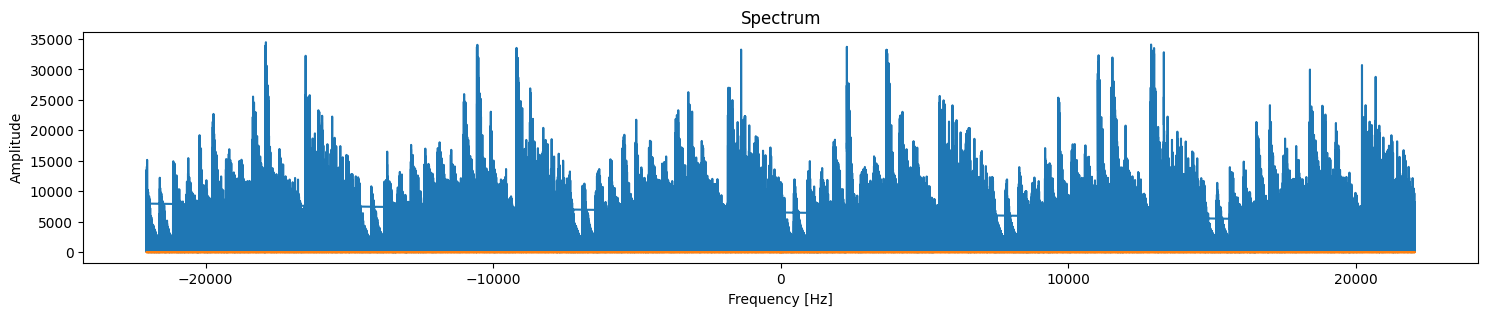

In [ ]:
transform = fft(data)
frequencies = fftfreq(len(data), 1/rate)
plt.figure(figsize=(18, 3))
plt.plot(frequencies, np.abs(transform))
plt.title('Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

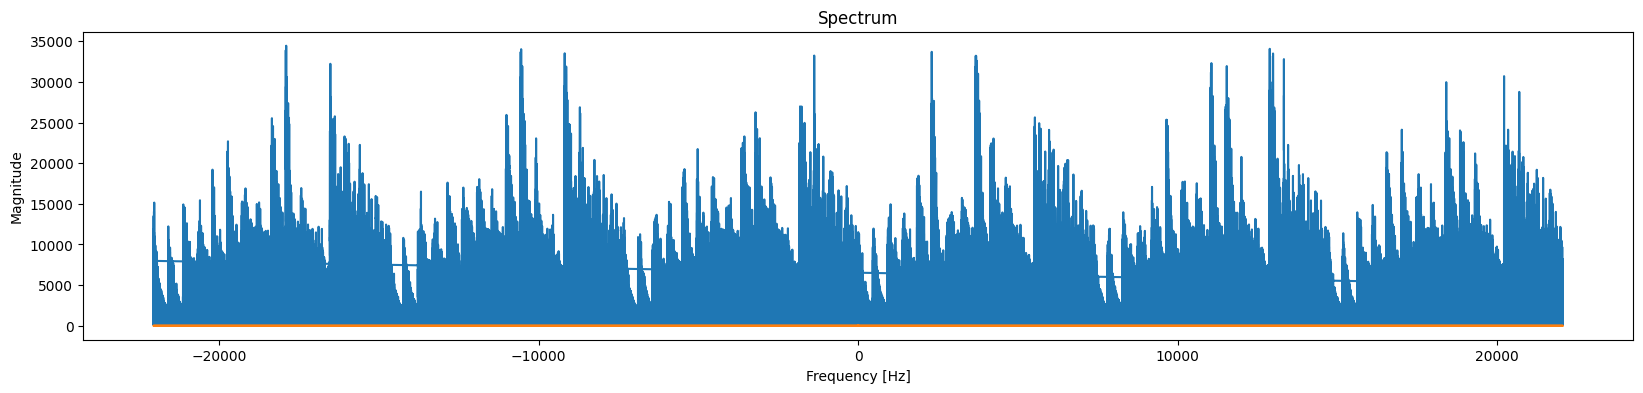

In [ ]:
# Пример

## **Задание 3: Фильтрация сигнала**



Фильтрация сигнала позволяет улучшить качество звука, убрав нежелательные частоты. Для этого вы можете использовать преобразование Фурье, затем обнулить некоторые из его коэффициентов и выполнить обратное преобразование Фурье с помощью функции `ifft` из модуля `scipy.fft`.

1. Создайте функцию для фильтрации сигнала с использованием преобразования Фурье.


In [20]:
def filtration_func(signal, freq, low_cutoff, high_cutoff):
  transform_fft = fft(signal)
  frequencies = fftfreq(len(signal), d=1/freq)

  transform_fft[(np.abs(frequencies) >= low_cutoff) & (np.abs(frequencies) <= high_cutoff)] = 0

  filtered_signal = ifft(transform_fft).real

  return filtered_signal

2. Примените эту функцию к звуковому сигналу и визуализируйте результаты до и после фильтрации.

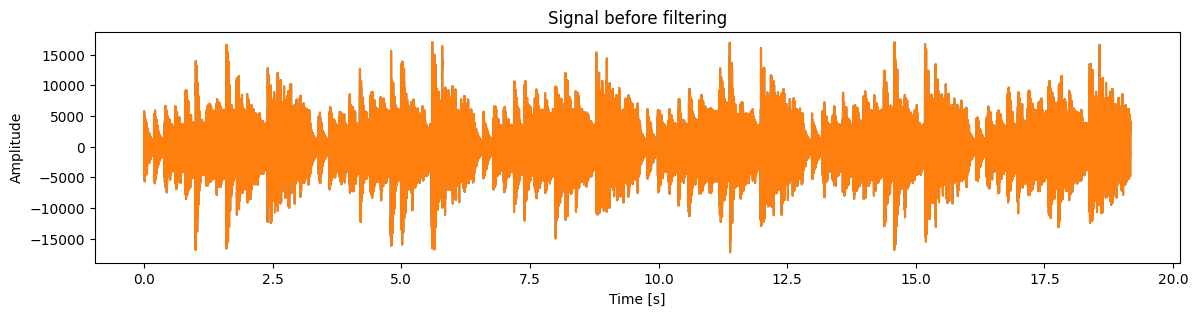

In [34]:
t = np.arange(len(data)) / rate

plt.figure(figsize=(14, 3))
plt.plot(t, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal before filtering')
plt.show()



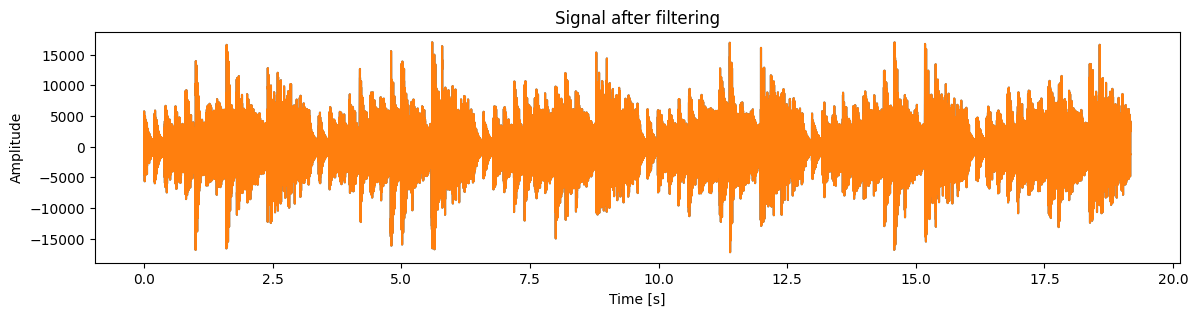

In [35]:
filtered_signal = filtration_func(data, rate, 20000, 20000)

plt.figure(figsize=(14, 3))
plt.plot(t, filtered_signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal after filtering')
plt.show()

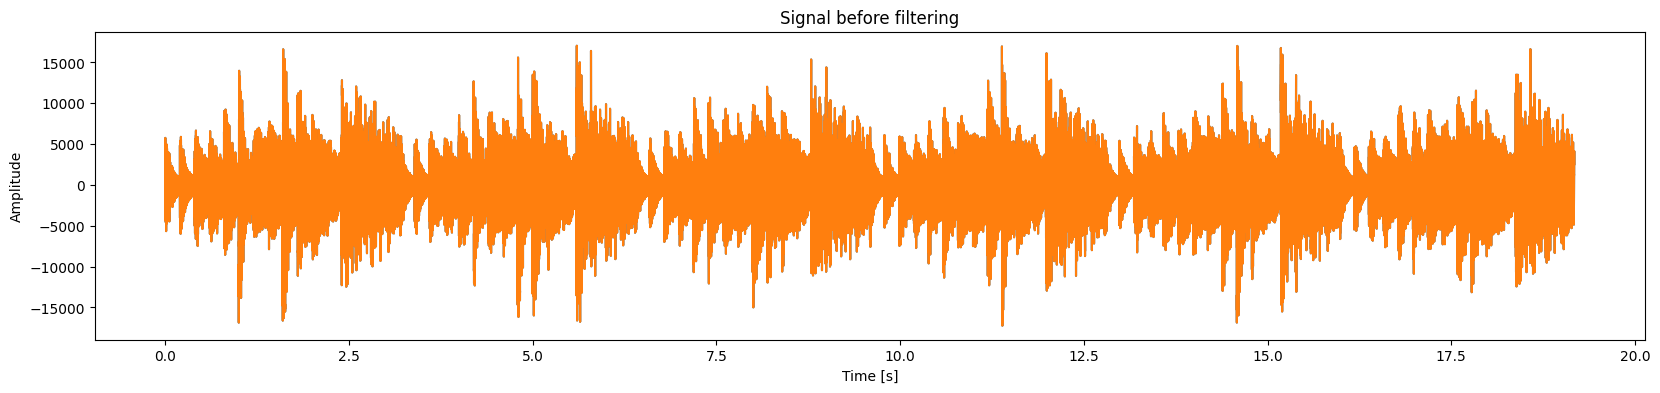

In [ ]:
# Визуализация сигнала до фильтрации

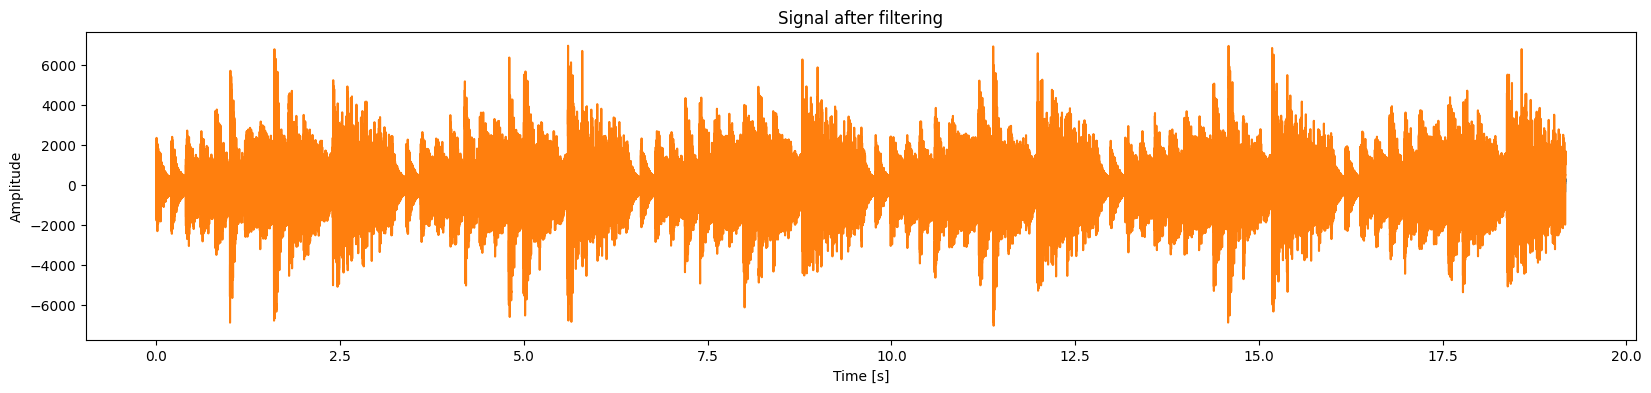

In [ ]:
# Визуализация сигнала после фильтрации

## **Задание 4: Обратное преобразование Фурье**



После фильтрации сигнала вы можете применить обратное преобразование Фурье для получения отфильтрованного звукового сигнала во временной области. Затем вы можете сохранить этот сигнал в новый звуковой файл с помощью функции `wavfile.write` из модуля `scipy.io`.

1. Примените обратное преобразование Фурье к отфильтрованному сигналу.


2. Сохраните полученный сигнал в новый звуковой файл.

In [36]:
wavfile.write('/content/filtered_sample_25sec.wav', rate, filtered_signal.astype(np.int16))